<a href="https://colab.research.google.com/github/JuanArchidona/Sklearn_Regresion_Lineal/blob/main/Juan_Archidona_05_WhiteWineQuality_ToDo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#White Wine Quality Data Set
Available on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality). The red wine samples were obtained from the north of Portugal to model red wine quality based on physicochemical tests. The dataset contains a total of 12 variables, which were recorded for 1,599 observations. The datasets are also available from http://www3.dsi.uminho.pt/pcortez/wine/


#Import pandas for organising dataframes

In [ ]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(url, sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


#Description of Qualities
1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: acetic acid content which leading to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt 
8. Fixed acidity: are non-volatile acids that do not evaporate easily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops.  (Wines > 45g/ltrs are sweet)

In [ ]:
df.shape

(4898, 12)

# Data Inspection
This is a complete data set. No gaps were found in data

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Descriptive Statistics
There is quite a bit of variation between means and standard deviations implying we should consider standardisng variables in pre-modelling

In [ ]:
#running descriptive statistics across all the variables
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#Import Libraries for Graphing and Visualization

In [ ]:
#Importing required packages.
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
df['quality'].count()

4898

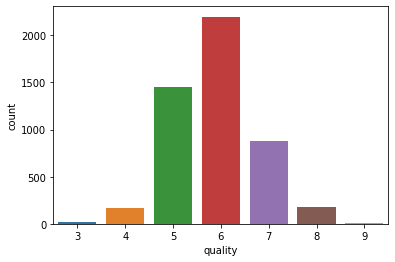

In [ ]:
sns.countplot(x='quality', data=df)

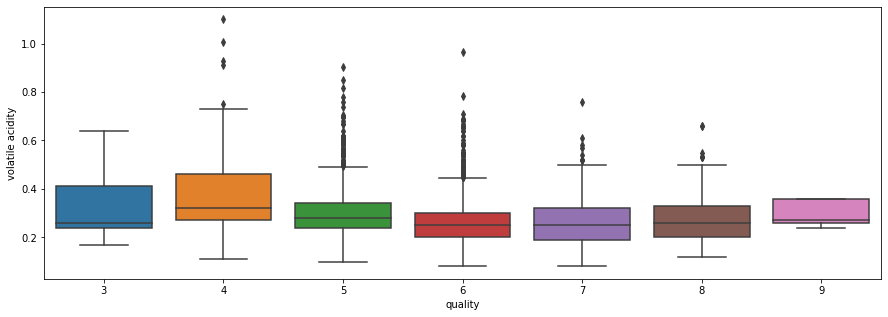

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity",   data=df )

#Setting out a correlation Matrix

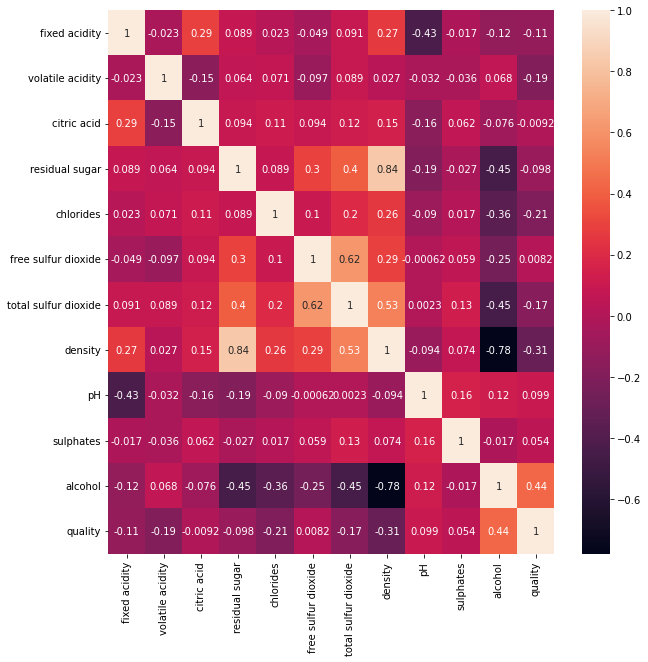

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color = "k", annot=True)

#Exploración de variables

A primera vista el correlograma anterior nos permite hacer alguna apreciación inicial:

- Nuestra variable de salida (quality) no mantiene una marcada dependencia con ninguna otra variable. Posteriormente vamos a incidir en este punto.

- Por otro lado hay parejas de variables que sí establecen una notable correlación entre ellas. Este factor va a ser uno de nuestros objetos de estudio, ya que podría tener cierta relevancia en los modelos de predicción.

Procedemos a listar las parejas de variables con mayor índice de correlación:

In [ ]:
df_aux = df.copy()
label_encoder = LabelEncoder()
df_aux['best_corr'] = label_encoder.fit_transform(df_aux['quality'])

corr_mat = df.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values(ascending = False)
sorted_mat_reverse = corr_mat.unstack().sort_values(ascending = True)
print(sorted_mat[12:18], "\n\n", sorted_mat_reverse[:6])

density               residual sugar          0.838966
residual sugar        density                 0.838966
total sulfur dioxide  free sulfur dioxide     0.615501
free sulfur dioxide   total sulfur dioxide    0.615501
total sulfur dioxide  density                 0.529881
density               total sulfur dioxide    0.529881
dtype: float64 

 alcohol               density                -0.780138
density               alcohol                -0.780138
alcohol               residual sugar         -0.450631
residual sugar        alcohol                -0.450631
total sulfur dioxide  alcohol                -0.448892
alcohol               total sulfur dioxide   -0.448892
dtype: float64


**De cara a posteriores visualizaciones y modelos de predicción, tomamos como referencia las variables de las siguientes parejas con mayor correlación:** 

- **density - alcohol (corr = -0.780138)**

- **density - residual sugar (corr = 0.838966)**

- **free sulfur dioxide - total sulfur dioxide (corr = 0.615501)**

A continuación visualizamos el histograma de cada variable. Para comprobar la distribución de sus valores: 

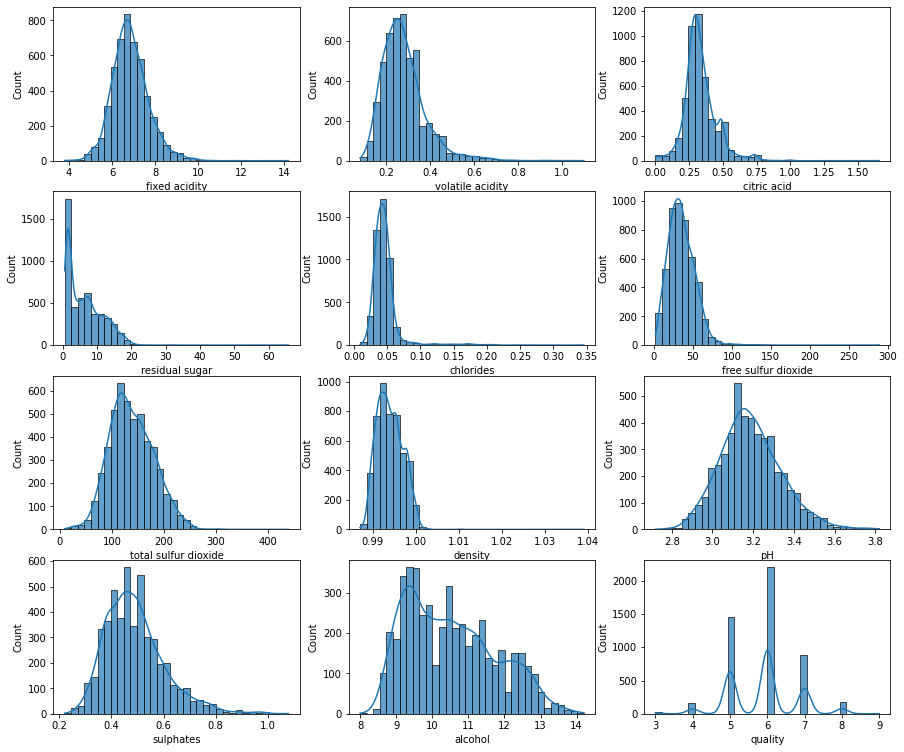

In [ ]:
plt.figure(figsize=(15, 13))

for i, j in enumerate(df.columns):
  plt.subplot(4, 3, i+1)
  sns.histplot(df[j], kde = True, bins = 'rice', alpha = 0.7)

plt.show();

- **La mayoría de los campos muestran un sesgo hacia los valores más altos.**

A continuación vamos a visualizar el boxplot de cada campo. Para comprobar con más detalle, dónde se encuentra el grueso de sus valores y outliers:

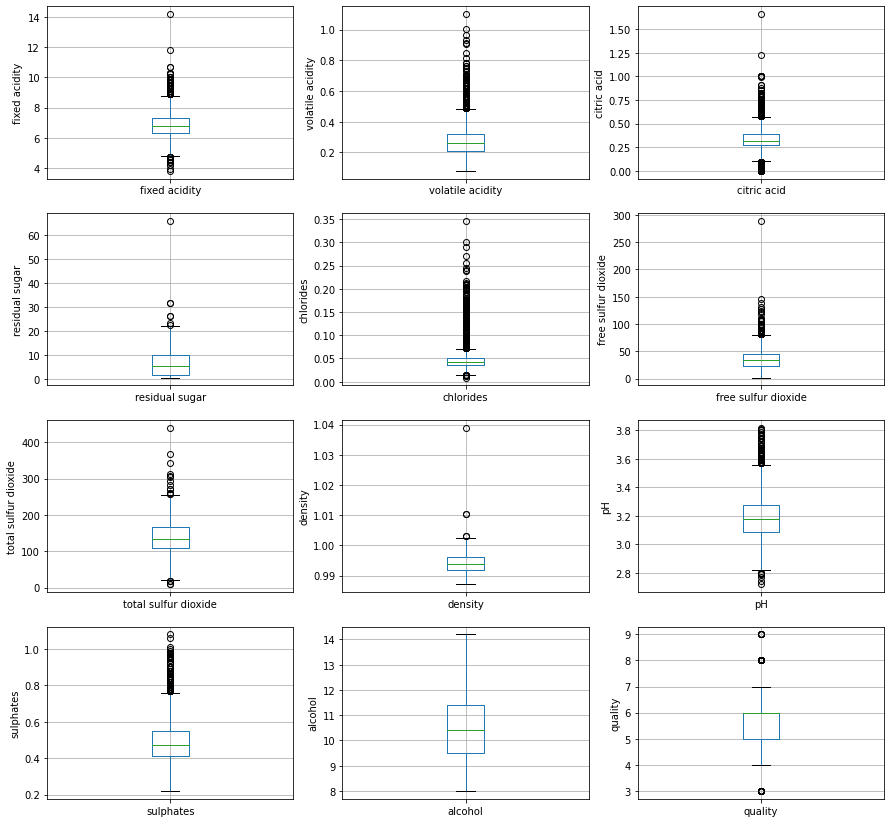

In [ ]:
plt.figure(figsize=(15, 45))

for i, j in enumerate(df.columns):
  plt.subplot(12, 3, i+1)
  fig = df.boxplot(column = j)
  fig.set_title("")
  fig.set_ylabel(j)

plt.show()

- **Residual Sugar, density, alcohol y quality son los campos con menos outliers. Consolidándose como variables de referencia.** 

- **Nuestra salida (quality) únicamente cuenta con 7 posibles valores. Este carácter casi-categórico nos induce a cruzarla, a través de boxplots con el resto de parámetros, para obtener más conclusiones:**

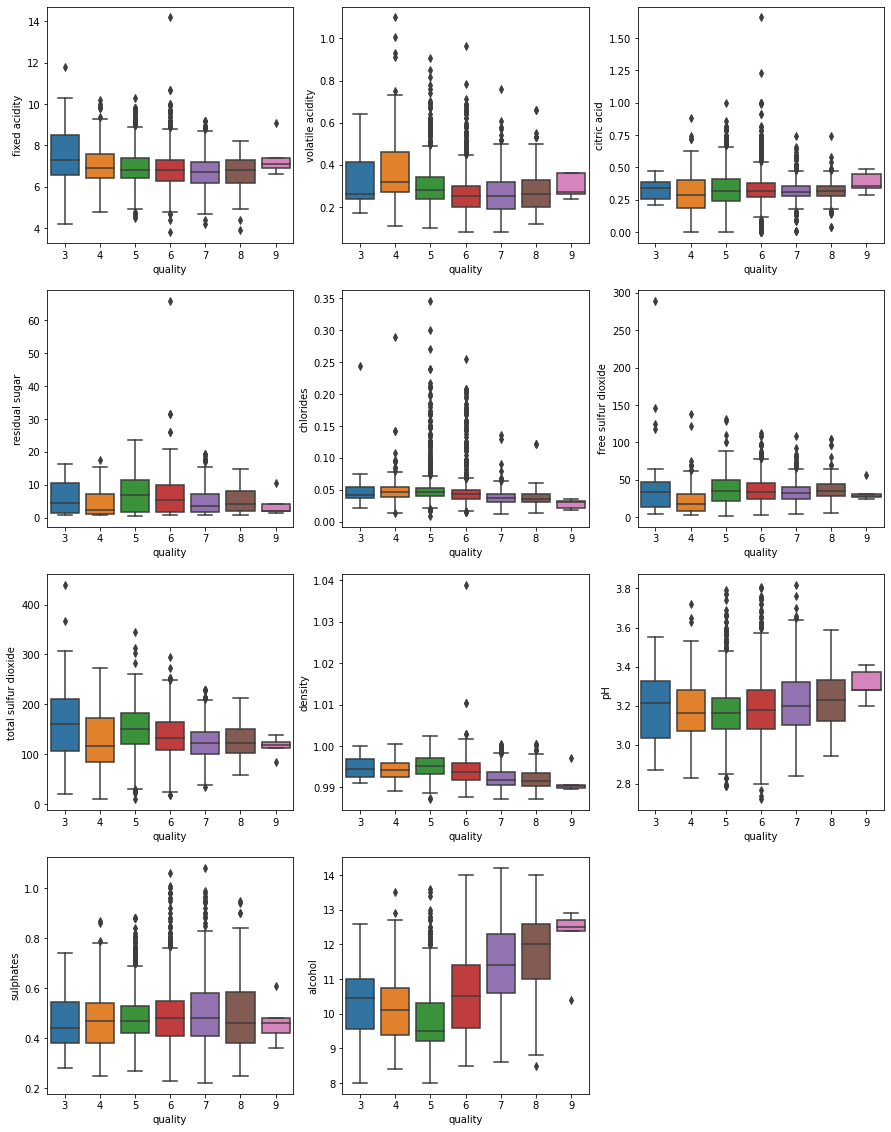

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 20))

for i, j in enumerate(list(df.columns)[:-1]):
  sns.boxplot(x = df.quality, y = df[j], ax = ax [i//3][i%3])
  
plt.delaxes(ax[3, 2])

- **Tal y como vimos en el correlograma anterior, el volumen de alcohol parece ser una clara referencia para determinar la calidad del vino blanco. La densidad también parece guardar cierta relación con la calidad.** 

- **Pero realmente son los niveles de correlación entre alcohol-densidad (-0.78) y azúcares residuales-densidad (0.84), los que están influyendo sobre la calidad. Como vamos a demostrar a continuación:**  

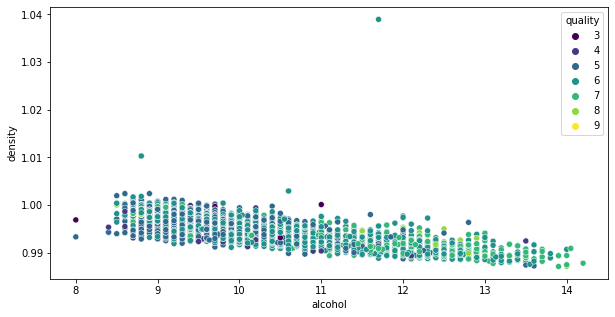

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(data=df, x="alcohol", y="density", hue="quality", palette="viridis")

plt.show();

- **Esta tendencia de bajada de la densidad final, a la vez que de aumento del volumen de alcohol, está justificada por el proceso de fermentación alcohólica:**

- **Antes de la fermentación, contamos con una densidad original del mosto. Durante la fermentación, una gran parte de dicha densidad (azúcares) se transforma en alcohol. Por lo que tiene sentido que ambas variables tengan una correlación inversa de -0.78.** 

- **El gráfico también demuestra que una mayor graduación alcohólica, suele ser sinónimo de calidad en el vino blanco (como resultado de una fermentación exitosa).**     

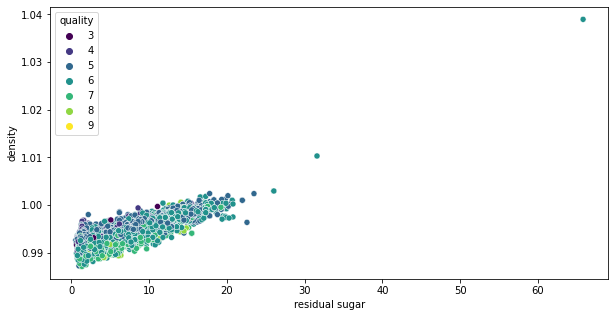

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(data=df, x="residual sugar", y="density", hue="quality", palette="viridis")

plt.show();

- **De igual manera podemos comprobar en este gráfico que un aumento de azúcares residuales (todos aquellos que no se han convertido en alcohol) desemboca en un aumento de la densidad final del vino blanco (correlación de 0.84).** 

- **También podemos verificar que un aumento de los azucares residuales (no fermentados) suele provocar un descenso en la calidad del vino blanco.**  

- **Como conclusión podemos afirmar que "density" es una variable realmente importante. Por sus marcadas correlaciones con "alcohol" y "residual sugar", fundamentadas en el mismo proceso de elaboración del vino blanco.**

**Por último vamos a representar un scatterplot de la pareja de variables "free sulfur dioxide" - "total sulfur dioxide" con una correlación de 0.61:**

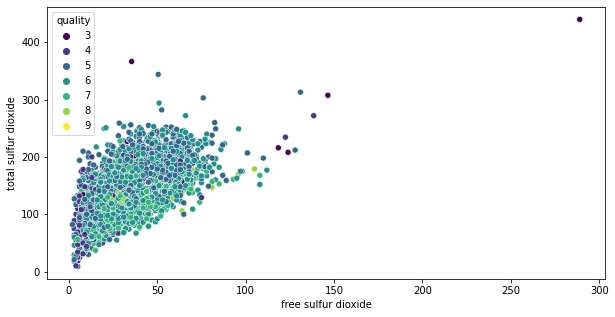

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(data=df, x = "free sulfur dioxide", y = "total sulfur dioxide", hue="quality", palette = "viridis")

plt.show();

- **Vemos una nube de puntos más dispersa que la de anteriores visualizaciones. Clara evidencia de una correlación entre variables de menor relevancia.**

#Modelización

**En primer lugar recordamos los campos que por parejas alcanzaron un mayor índice en el correlograma: alcohol, density y residual sugar.** 

Declaramos dos nuevas variables, en las que vamos a registrar la siguiente información:

- X = todas las filas y columnas correspondientes a todos los campos de nuestro dataset, salvo nuestra variable de salida. 

- y = nuestra variable de salida con sus correspondientes registros. 

In [ ]:
X = df.iloc[:, 0:11]
y = df.iloc[:, -1]

**Vamos a establecer diversos modelos lineales con y sin regularización, con el objetivo de encontrar cual es el más eficaz a la hora de predecir la calidad de un vino blanco.**

- **Para poder evaluar la capacidad predictiva de cada modelo, vamos a utilizar el método "train_test_split". Que divide las observaciones disponibles en dos grupos: uno de entrenamiento (70% con X_train e y_train) y otro de test (30% con X_test e y_test):**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                    )

**Nuestro objetivo es obtener y comparar los siguientes resultados:**

- **El resultado de error de la regresión lineal sin regularización.** 

- **El mejor de los 100 modelos regularizados que devuelve el método Ridge.**

- **El mejor de los 100 modelos regularizados que devuelve el método Lasso.**

- **Los tres modelos cuentan con funciones de coste y alphas diferentes entre si. Por lo que sus correspodientes combinaciones de betas también serán distintas. Igualmente los resultados de sus predicciones y errores también serán diferentes. Por lo que tiene sentido quedarnos con el más eficaz de los tres en base a su error.**

##Regresión Lineal sin regularización

La iniciamos con el método "Linear Regression":

- Esta función ya incluye los términos de penalización y función de coste.

- Le pedimos al modelo que encuentre la recta que mejor se ajuste a los datos de entrenamiento. Para poder testearlos posteriormente. 

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

- Vamos a visualizar los coeficientes correspodientes a cada variable, nombrándolos con los mismos términos.

- El método flatten() de numpy devuelve una copia del array colapsado a una única dimensión.

- En el eje x encontraremos las variables originales.

- El el eje y estarán los coeficientes (betas).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


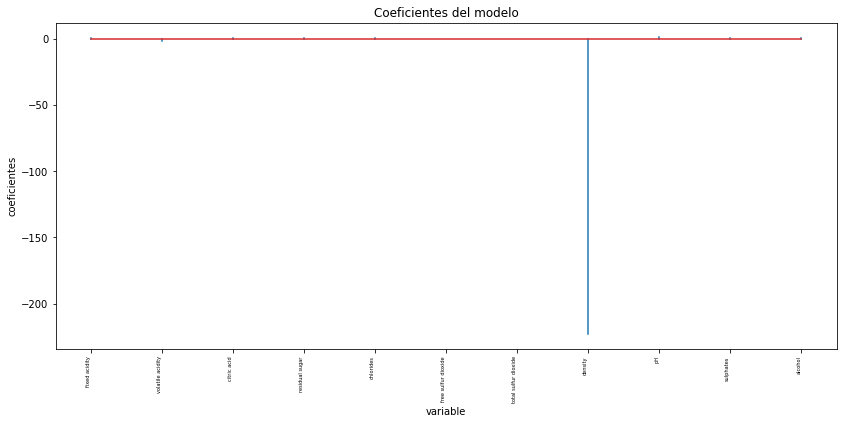

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )
fig, ax = plt.subplots(figsize=(14, 6))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

- Podemos observar que la variable con el peso más abultado (-222.792202) es "density". 

- El resto de variables obtienen unos coeficientes nulos o muy cercanos a 0.

A continuación vamos a comprobar la eficacia de este modelo de regresión lineal:

- Para ello establecemos la variable "predicciones". A la que vamos a pasar los resultados de la función de predicción, a partir de todos nuestros valores de prueba.

- Nuesto objetivo es reducir la suma de errores (diferencias entre valores observados y predichos) al cuadrado, dividida por el número de observaciones.

- Para ello declaramos una nueva variable "mse_ols". En la que vamos a registrar el error medio cuadrático gracias a la función "mean_squared_error". Que requiere los valores estimados y de predicción. El parámetro "squared" valida que trabajamos con errores al cuadrado. 

In [ ]:
predicciones = modelo.predict(X=X_test)

mse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = True
           )

print(f"El error (MSE) de test es: {round(mse_ols,2)}")
print(f"Las predicciones del modelo final se alejan en promedio {round(mse_ols,2)} unidades del valor real.")

El error (MSE) de test es: 0.6
Las predicciones del modelo final se alejan en promedio 0.6 unidades del valor real.


- **Podemos establecer que un error de predicción medio de 0.6 unidades, sobre una variable cuyos resultados comprobados abarcan desde 3 a 9 unidades, es un error razonable.** 

- **Ya que en el peor de los casos, supondría un error medio porcentual del 20% ((0.6 / 3) * 100 = 20%).**

- **Cabe destacar que obtendríamos un peor resultado de error (RMSE - 0.78) al cambiar el parámetro squared a "False".**

Vamos a visualizar una comparativa de las salidas y errores, en base a este modelo:

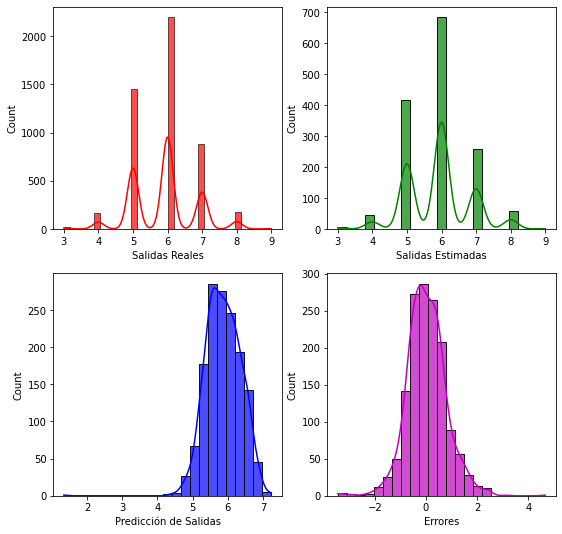

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(y, kde = True, color = "r", bins = 'rice', ax = axs[0, 0], alpha = 0.7)
axs[0, 0].set(xlabel ="Salidas Reales")

sns.histplot(y_test, kde = True, color = "g", bins = 'rice', ax = axs[0, 1], alpha = 0.7)
axs[0, 1].set(xlabel ="Salidas Estimadas")

sns.histplot(predicciones, kde = True, color = "b", bins = 'rice', ax = axs[1, 0], alpha = 0.7)
axs[1, 0].set(xlabel ="Predicción de Salidas")

sns.histplot(y_test - predicciones, kde = True, color = "m", bins = 'rice', ax = axs[1, 1], alpha = 0.7)
axs[1, 1].set(xlabel ="Errores")

plt.show();

- **Las salidas reales y observadas mantienen una proporción prácticamente idéntica (como era de esperar antes y después de partir el dataset en train y test).**

- **La predicción de salidas tiene una escala más acotada. Sin resultados cercanos a los valores extremos reales (3, 4, 8 o 9). Para hacer la predicción han pesado más las salidas reales con una mayor frecuencia (5, 6, 7).**

- **Las salidas y errores de la predicción reflejan una distribución similar a una normal o Gaussiana.** 

##Regularización con Ridge

- Consiste en sumar un valor de complejidad, medido como la media cuadrática de los coeficientes del modelo. Ayuda a reducir los coeficientes de variables fuertemente correladas.

- Declaramos la variable alphas, **asignándole una escala logarítmica (np.logspace(-7, 0, 100)) que hemos debido cambiar respecto a la escala teórica (np.logspace(-11, -3, 100)). Para conseguir obtener una visualización con información más relevante, prescindiendo de los tramos en los que todas las betas tienen un valor constante.**  

- A diferencia de la regresión lineal, necesitamos lanzar el modelo varias veces. Para poder comprobar el error resultante de predecir cada combinación de alfas y betas.

- Inicializamos el bucle iterando sobre cada alfa. Al mismo tiempo que pasamos los valores de train, como parámetros, a un modelo temporal. 

- De igual manera, vamos almacenando los coeficientes y los errores cuadráticos entregados por el modelo, en cada iteración del bucle. 

- También hacemos una predicción con el alpha correspondiente a cada iteración, pasándole los valores de test como parámetro.

In [ ]:
alphas = np.logspace(-7, 0, 100)
print(f"alphas = {alphas[0:10]}")
coefs = []
mse_ridge = [] 

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    
    predicciones = modelo_temp.predict(X=X_test)
    mse_ridge.append(mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = True
           ))

alphas = [1.00000000e-07 1.17681195e-07 1.38488637e-07 1.62975083e-07
 1.91791026e-07 2.25701972e-07 2.65608778e-07 3.12571585e-07
 3.67837977e-07 4.32876128e-07]


Procedemos a visualizar la comparación de los coeficientes con sus correspondientes alfas:

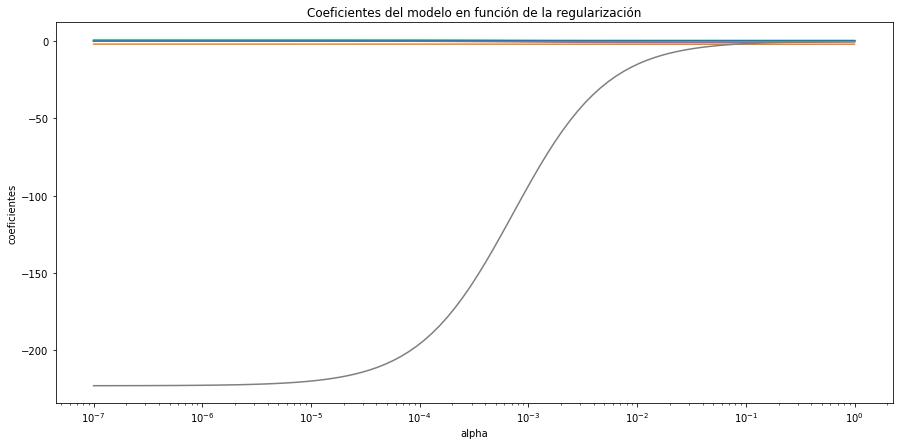

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

- **Comprobamos que el rango de alfas marcado anteriormente realmente nos muestra una visualización relevante. Descartando aquellos tramos que mantendrían todos los coeficientes en valores constantes.**

- **Podemos observar que, incluso los alfas con valores muy pequeños, ya penalizan los valores de sus correspondientes coeficientes (betas).**

- **Los betas parten de los mismos valores que en el modelo anterior. Pero van siendo penalizados a medida que los alfas aumentan, ajustando igualmente el error.**

Procedemos a visualizar la evolución del error para cada alfa:

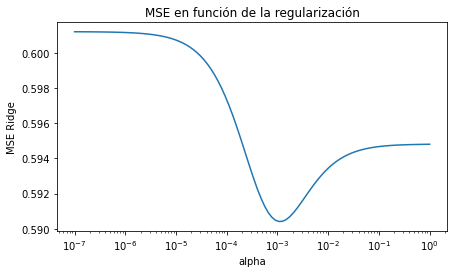

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, mse_ridge)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE Ridge')
ax.set_title('MSE en función de la regularización');
plt.axis('tight')
plt.show()

- **El error se mantiene constante hasta que los betas comienzan a penalizar. Su valor comienza a bajar hasta que alcanza su mínimo. En ese mismo punto obtenemos el mejor error, que corresponde al alfa con el que nos quedaremos.**

- **Posteriormente el error vuelve a subir para ya mantenerse constante.**

Vamos a determinar numéricamente el valor mínimo del error y su correspondiente alfa:

In [ ]:
min_mse_ridge = min(mse_ridge)
index_min_mse = mse_ridge.index(min_mse_ridge)
min_mse_alpha = alphas[index_min_mse]

print(f"El error (MSE) de test es: {min_mse_ridge}")
print(f"Las predicciones del modelo final se alejan en promedio {round(min_mse_ridge,2)} unidades del valor real.")
print(f"Su Alfa correspondiente es: {min_mse_alpha}")
print(f"Su posición es correspondiente es: {index_min_mse}")

El error (MSE) de test es: 0.5904051686915399
Las predicciones del modelo final se alejan en promedio 0.59 unidades del valor real.
Su Alfa correspondiente es: 0.0010722672220103231
Su posición es correspondiente es: 57


- **Hemos registrado la posición en el indice correspondiente al error mínimo en la variable "index_min_mse".**

- **Podemos establecer que un error de predicción medio de 0.5904 unidades, sobre una variable cuyos resultados comprobados abarcan desde 3 a 9 unidades, es un error bastante razonable.** 

- **Ya que en el peor de los casos, supondría un error medio porcentual inferior al 20% ((0.5904 / 3) * 100 = 19.68%).**

- **Cabe destacar que obtendríamos un peor resultado de error (RMSE - 0.77) al cambiar el parámetro squared a "False".**

Vamos a visualizar una comparativa de las salidas y errores, en base a este modelo:

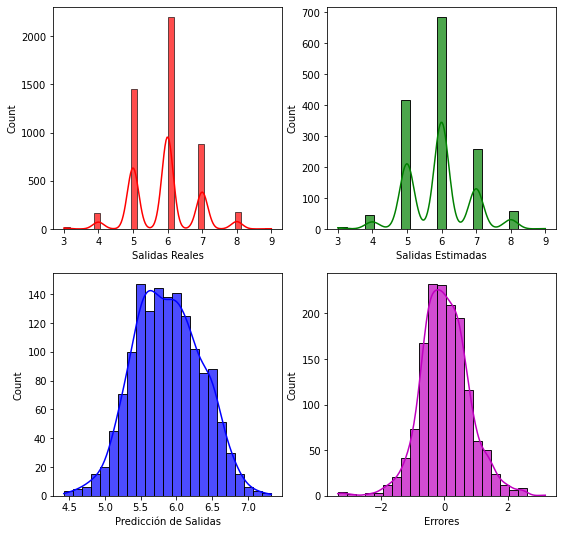

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(y, kde = True, color = "r", bins = 'rice', ax = axs[0, 0], alpha = 0.7)
axs[0, 0].set(xlabel ="Salidas Reales")

sns.histplot(y_test, kde = True, color = "g", bins = 'rice', ax = axs[0, 1], alpha = 0.7)
axs[0, 1].set(xlabel ="Salidas Estimadas")

sns.histplot(predicciones, kde = True, color = "b", bins = 'rice', ax = axs[1, 0], alpha = 0.7)
axs[1, 0].set(xlabel ="Predicción de Salidas")

sns.histplot(y_test - predicciones, kde = True, color = "m", bins = 'rice', ax = axs[1, 1], alpha = 0.7)
axs[1, 1].set(xlabel ="Errores")

plt.show();

- **Las salidas reales y observadas mantienen una proporción prácticamente idéntica (como era de esperar, antes y después de partir el dataset en train y test).**

- **La predicción de salidas tiene una escala aún más acotada que la de la regresión lineal sin regularización. Sin resultados cercanos a los valores extremos reales (3, 4, 8 o 9). Para hacer la predicción han pesado más las salidas reales con una mayor frecuencia (5, 6, 7).**

- **Las salidas y errores de la predicción reflejan una distribución similar a una normal o Gaussiana. También es un poco menos sesgada (hacía los valores menores) que la de la regresión lineal sin regularización.** 

A continuación vamos a:

- Recuperar los coeficientes (betas) correspodientes al error mínimo obtenido anteriormente.

- Vamos a representalos gráficamente.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


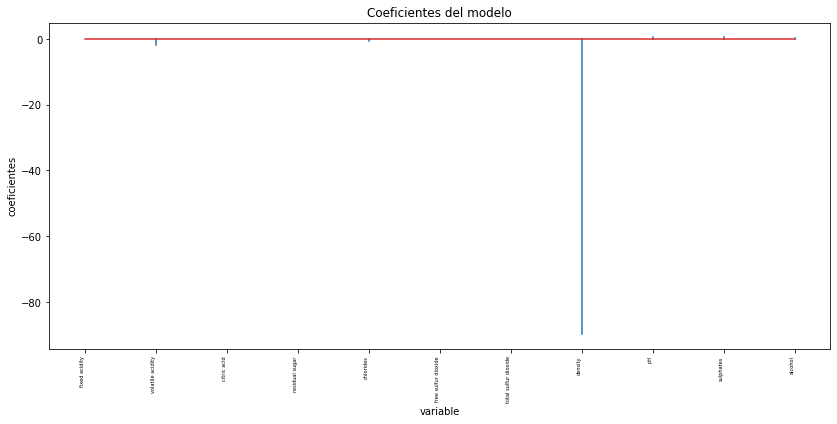

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': coefs[index_min_mse]}
                  )

fig, ax = plt.subplots(figsize=(14, 6))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

A estas alturas y tras aplicar el modelo con regularización por Ridge, podemos determinar que: 
 
- **El rango de los coeficientes (betas) se ha ajustado drásticamente.** 

- **Hemos conseguido reducir el error.**

##Regularización con Lasso

- Consiste en sumar un valor de complejidad, medido como la media del valor absoluto de los coeficientes del modelo. Ayuda a deshacernos de las features o variables que puedan considerarse irrelevantes. Igualando sus coeficientes a 0 y obteniendo un modelo que generalice mejor.  

- Declaramos la variable alphas, **asignándole una escala logarítmica (np.logspace(-4.37, 0, 100)) que hemos debido cambiar respecto a la escala teórica (np.logspace(-3.8, 0, 100)). Para obtener una visualización con información más relevante, prescindiendo de los tramos en los que todas las betas tienen un valor constante.**

- A diferencia de la regresión lineal sin regularización, necesitamos lanzar el modelo varias veces. Para poder comprobar el error resultante de predecir cada combinación de alfas y betas.

- Inicializamos el bucle iterando sobre cada alfa. Al mismo tiempo que pasamos los valores de train, como parámetros, a un modelo temporal. También debemos aumentar el número máximo de iteraciones del modelo Lasso (25000), para conseguir que los valores resultado converjan. Fijamos una tolerancia (0.01) más permisiva que la establecida por defecto (0.0001) para aumentar la eficacia de las iteraciones. Sklearn nos indica que en este caso debemos marcar el parámetro "selection" como "random".

- De igual manera, vamos almacenando los coeficientes y los errores cuadráticos entregados por el modelo, en cada iteración del bucle. 

- También hacemos una predicción con el alpha correspondiente a cada iteración, pasándole los valores de test como parámetro.

In [ ]:
alphas = np.logspace(-4.37, 0, 100) 
coefs = []
mse_lasso = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, selection='random', max_iter=25000, tol=0.01) 
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    
    predicciones = modelo_temp.predict(X=X_test)
    mse_lasso.append(mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = True
           ))

Procedemos a visualizar la comparación de los coeficientes con sus correspondientes alfas:

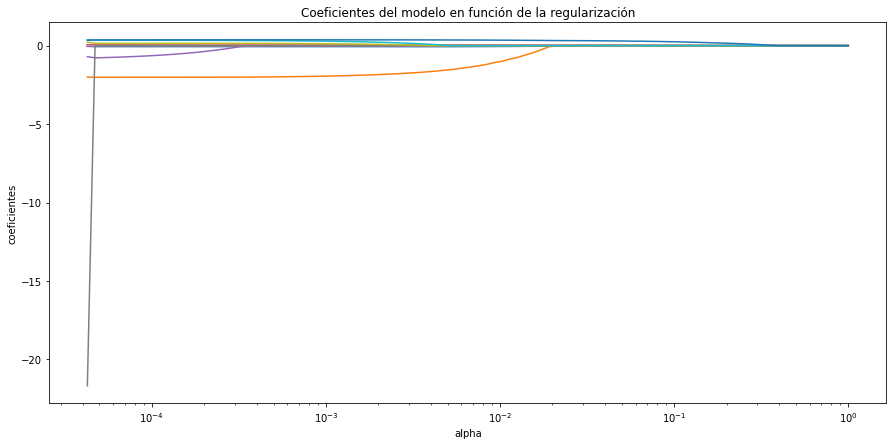

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

- **Comprobamos que el rango de alfas marcado anteriormente realmente nos muestra una visualización relevante. Descartando aquellos tramos que mantendrían todos los coeficientes en valores constantes.**

- **Observamos que aquellas variables más cercanas a 0, acaban siendo convertidas a 0.**

Vamos a visualizar la evolución del error para cada alfa:

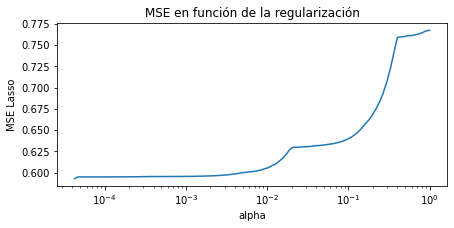

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(alphas, mse_lasso)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE Lasso')
ax.set_title('MSE en función de la regularización');
plt.axis('tight')
plt.show()

- **La escala del error ha aumentado respecto a Ridge.**

- **Vemos que el error aumenta a medida que las alphas comienzan a penalizar. El error tiene un comportamiento diferente al del modelo Ridge.**

- **De modo que el error mínimo se encontraría, con toda seguridad, al comienzo de la representación gráfica.**

Vamos a determinar numéricamente el valor mínimo del error y su correspondiente alfa:

In [ ]:
min_mse_lasso = min(mse_lasso)
index_min_mse = mse_lasso.index(min_mse_lasso)
min_mse_alpha = alphas[index_min_mse]

print(f"El error (MSE) de test es: {min_mse_lasso}")
print(f"Las predicciones del modelo final se alejan en promedio {round(min_mse_lasso,2)} unidades del valor real.")
print(f"Su Alfa correspondiente es: {min_mse_alpha}")

El error (MSE) de test es: 0.5929104333279368
Las predicciones del modelo final se alejan en promedio 0.59 unidades del valor real.
Su Alfa correspondiente es: 4.265795188015926e-05


- **Hemos registrado la posición en el indice correspondiente al error mínimo en la variable "index_min_mse".**

- **Podemos establecer que un error de predicción medio de 0.5929 unidades, sobre una variable cuyos resultados comprobados abarcan desde 3 a 9 unidades, es un error bastante razonable.** 

- **Ya que en el peor de los casos, supondría un error medio porcentual inferior al 20% ((0.5929 / 3) * 100 = 19.77%).**

- **He podido comprobrar que disminuyendo el extremo inferior de la escala logarítmica de las alfas, se puede obtener un error de predicción medio inferior al del modelo Ridge.**

- **Cabe destacar que obtendríamos un peor resultado de error (RMSE - 0.77) al cambiar el parámetro squared a "False".**

Vamos a visualizar una comparativa de las salidas y errores, en base a este modelo:

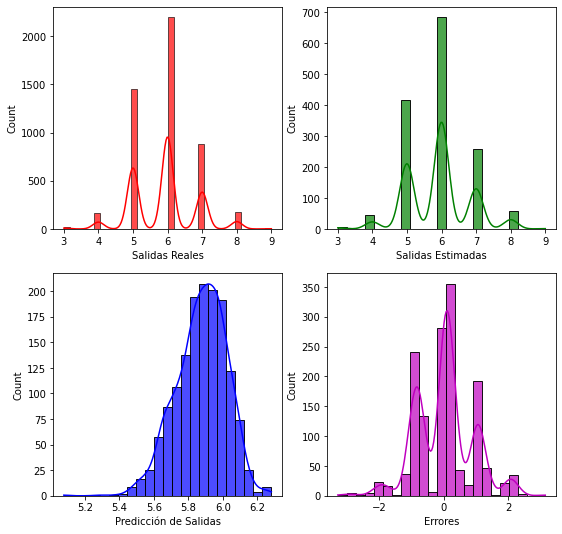

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(y, kde = True, color = "r", bins = 'rice', ax = axs[0, 0], alpha = 0.7)
axs[0, 0].set(xlabel ="Salidas Reales")

sns.histplot(y_test, kde = True, color = "g", bins = 'rice', ax = axs[0, 1], alpha = 0.7)
axs[0, 1].set(xlabel ="Salidas Estimadas")

sns.histplot(predicciones, kde = True, color = "b", bins = 'rice', ax = axs[1, 0], alpha = 0.7)
axs[1, 0].set(xlabel ="Predicción de Salidas")

sns.histplot(y_test - predicciones, kde = True, color = "m", bins = 'rice', ax = axs[1, 1], alpha = 0.7)
axs[1, 1].set(xlabel ="Errores")

plt.show();

- **Las salidas reales y observadas mantienen una proporción prácticamente idéntica (como era de esperar, antes y después de partir el dataset en train y test).**

- **La predicción de salidas tiene una escala aún más acotada que la de la regresión lineal sin regularización y que la de el modelo Ridge. Sin resultados cercanos a los valores extremos reales (3, 4, 8 o 9). Para hacer la predicción han pesado más las salidas reales con una mayor frecuencia (5, 6, 7). Tiene una distribución más alejada a una normal, en comparación a los otros dos modelos. Y con un claro sesgo hacia los valores menores a la media.**

- **El histograma de los errores se aleja aún más de una distribución Gaussiana. Como podíamos esperar tras haber visto anteriormente el gráfico de su evolución. Causado por el cambio en la influencia de las penalizaciones sobre el error.** 

A continuación vamos a:

- Recuperar los coeficientes (betas) correspodientes al error mínimo obtenido anteriormente.

- Vamos a representalos gráficamente.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


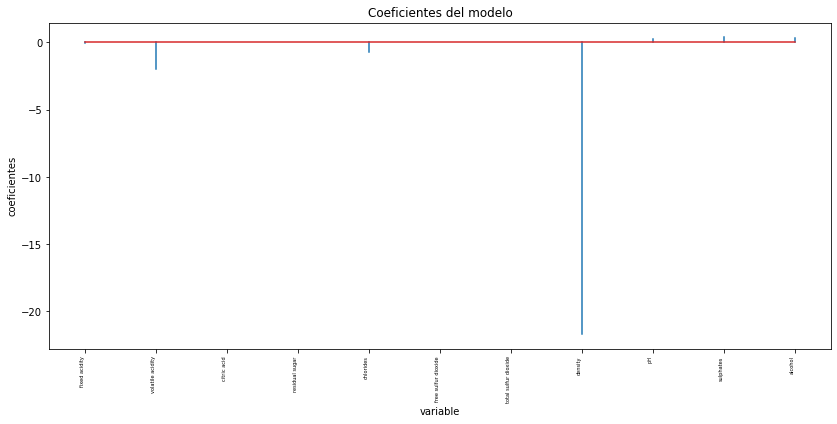

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': coefs[index_min_mse]}
                  )

fig, ax = plt.subplots(figsize=(14, 6))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

A estas alturas y tras aplicar el modelo con regularización por Lasso, podemos determinar que: 
 
- **El rango de los coeficientes (betas) aún se ha ajustado más severamente.** 

Por último vamos a ver con cuantas variables nos hemos quedado tras aplicar Lasso:

- Recuperando la combinación de betas que más ajusta el error. 

- Por último recuperamos el número de coeficientes mayores de 0 (que no han sido eliminados por Lasso).

In [ ]:
l1_coef = coefs[index_min_mse]
p_variables = sum(abs(l1_coef) > 0)
print(f"El error (MSE) de test es: {min_mse_lasso}")
print(f"Las predicciones del modelo final se alejan en promedio {round(min_mse_lasso,2)} unidades del valor real.")
print(f"Estas predicciones se consiguen con {p_variables} variables")

El error (MSE) de test es: 0.5929104333279368
Las predicciones del modelo final se alejan en promedio 0.59 unidades del valor real.
Estas predicciones se consiguen con 11 variables


- **Comprobamos que el modelo Lasso no prescinde de ninguna variable (11 = número de variables originales) para hacer estas predicciones.**

#Conclusiones

**Los errores obtenidos (mse) entre los tres modelos son muy similares (Regresión Lineal: 0.6 - Ridge: 0.5904 - Lasso: 0.5932). Vamos a describir los posibles causantes de su cercanía:**

- **En primer lugar debemos tener en cuenta que la regresión líneal refleja un error medio de sus predicciones muy ajustado. Ya que podemos considerar que 0.6 unidades es una medida de error razonable, al compararla con la salidas reales de "quality" (3, 4, 5, 6, 7, 8 y 9 unidades).**

- **Ridge tiene como objetivo ajustar el peso de diversas variables que estén fuertemente correladas entre si. En la primera parte del análsis pudimos comprobar que únicamente las parejas de variables "density" - "alcohol" y "density" - "residual sugar" mantienen una correlación superior, en valor absoluto, a 0.7.** 

- **De modo que estamos limitando el campo de actuación de Ridge ante la excasa correlación entre las 11 variables. Pudiendo únicamente ajustar el valor del error medio de las predicciones (0.5904) en torno a 0.01 unidades menos que el de la regresión lineal (0.6).**

- **El objetivo de Lasso es ayudarnos a descartar aquellas variables de entrada que no sean relevantes. En nuestro caso no contamos con features muy relacionadas con la salida (quality). Ya que la variable "alcohol" es la feature con una mayor correlación con la salida "quality", con un pobre índice de 0.41. Por lo que, tal y como muestra el resultado de Lasso, no se puede prescindir de ninguna variable irrelevante, que estuviera estrechamente relacionada con la salida.**

- **Este factor desemboca en que el error medio de Lasso (0.5932 unidades) únicamente supone un ajuste de en torno a 0.007 respecto al de la regresión lineal sin regularización (0.6).**

- **La eficacia comparativa inicial de la regresión lineal (sin regularización), junto con la naturaleza de las variables y una marcada independencia entre ellas, justifican la escasa diferencia entre las medidas de error arrojadas por los tres modelos.**

**Hemos podido comprobar que los valores de las betas se han ajustado al aplicar los diferentes modelos:**

- **Obtenemos diferentes escalas de betas para cada modelo: regresión lineal (-222.792202 a 0.884649), Ridge (-89.697787 a 0.46414) y Lasso (-21.601351 a 0.375245). Comprobamos que la regularizaciones efectivamente han ajustado los coeficientes y su rango de valores.**

- **La variable "density" registra la beta más abultada (en valor absoluto) en los tres modelos. Validando la marcada relevancia que ya comprobamos en la exploración de variables.**

**No hay un claro vencedor entre los tres modelos. Quizás podamos considerar Ridge por encima, al haber obtenido un mse menor. Sumado al hecho de que Lasso no ha estimado deshacerse de ninguna variable.**